In [1]:
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [10]:
import pandas as pd
import numpy as np
import time
import os
import re
import random
from matplotlib import pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from bayes_opt import BayesianOptimization
from sklearn.metrics import classification_report

from src import fns_models as fns


% matplotlib inline

from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf-8"))

athenaeum_authors_preview.csv
athenaeum_painting_filtered.csv
athenaeum_paintings.csv
athenaeum_paintings_sizes.csv
color_histograms.csv
complete_data.csv
images
images_athenaeum
images_sizes_2325.csv
net_predicted.csv
painter_info_clean.csv
painting_info_clean.csv
resized_200
test_author200.csv
test_data.csv
test_hist_author_knn.csv
test_hist_author_rf.csv
train_author200.csv
train_data.csv
train_hist_author_knn.csv
train_hist_author_rf.csv



In [11]:
train, train_labels, test, test_labels = fns.get_top_author(3)

[INFO] The size of train histogram for Random Forest(49890, 34)
[INFO] The size of test histogram for Random Forest(12473, 34)
24      1369
1793    1338
368     1335
Name: author_id, dtype: int64
[trian above] ==================================================[test below]
24      342
1793    335
368     334
Name: author_id, dtype: int64
(4042,)
(4042, 34)


In [12]:
# Do not run it 
train = train.sample(20)
test = test.sample(20)
train_labels = train_labels.sample(20)
test_labels = test_labels.sample(20)

In [13]:
# def svccv(C, gamma, kernel):
#     val = cross_val_score(
#         SVC(C=C, gamma=gamma, kernel = kernel, random_state=2017),
#         train, train_labels, 'f1', cv=5, n_jobs = 4
#     ).mean()

#     return val

# def svccv_pca(C, gamma, kernel):
#     val = cross_val_score(
#         SVC(C=C, gamma=gamma, kernel = kernel, random_state=2017),
#         pca_transformed, train_labels, 'f1', cv=5, n_jobs = 4
#     ).mean()

#     return val


def svc_gs(C, gamma):
    gs_params = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [C],
                'gamma': [gamma]}
    clf = GridSearchCV(SVC(), gs_params, cv=5, n_jobs = 4)
    clf.fit(train, train_labels)
    
#     print(clf.best_params_)
#     print clf.score
    
#     y_true, y_pred = test_labels, clf.best_estimator_.predict(test)
#     print(classification_report(y_true, y_pred))
    return clf.score

def svc_pca_gs(C, gamma):
    gs_params = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [C],
                'gamma': [gamma]}
    clf = GridSearchCV(SVC(), gs_params, cv=5, n_jobs = 4)
    clf.fit(pca_transformed, train_labels)
    
#     print(clf.best_params_)
#     print clf.score
    
#     y_true, y_pred = test_labels, clf.best_estimator_.predict(test)
#     print(classification_report(y_true, y_pred))
    return clf.score



def svc_bo(svc_fn=svc_gs):
    start_time = time.time()
    
    #gp_params = {"alpha": 1e-5}

    svcBO = BayesianOptimization(svc_fn,
        {'C': (0.001, 100), 'gamma': (0.0001, 0.1)})
    svcBO.explore({'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1]})

    svcBO.maximize(n_iter=10)
    print('-' * 53)
    print '\n%f' % (time.time() - start_time)
    
    print "Bayesian Optimization Best Score: %d" % svcBO.res['max']['max_val']

    print "Bayesian Optimization Best Parameters: %s" % str(svcBO.res['max']['max_params'])
    fns.plot_bo(svc_fn, svcBO)

#     print "Bayesian Optimization  Parameters: %s" % str(svcBO.res['all'])
    
    


In [15]:
# SVM for color histgram
svc_bo()

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    1 | 00m00s | 

ValueError: Unknown format code 'f' for object of type 'str'

In [ ]:
# Build a new model by using the best parameters
best_C = 
best_kernel = 
beset_gamma = 
svc_best = SVC(Kernel=best_kernel, C=best_C, gamma=beset_gamma)
svc_best

In [ ]:
svc_best.fit(train, train_labels)

# accuracy of trianing dataset
print "Accuracy of best SVC model on training: %s" % str(svc_best.score(train, train_labels))

# accuracy of testing dataset
print "Accuracy of best SVC model on training: %s" % str(svc_best.score((test, test_labels))


In [ ]:
# use the best params to predict
svc_pac_true, svc_pca_pred = test_labels, svc_best.predict(test)
svc_pca_pred

In [ ]:
test_data_df = result_table(svc_pac_true, rfc_pred)
test_data_df

======================================================================================================

# SVM + PCA

======================================================================================================

In [8]:
## Get 15 principal components
pca = PCA(n_components=15)
pca.fit(train)
pca_transformed = pca.transform(train)
pca_transformed_test = pca.transform(test)

0.96356733985523346

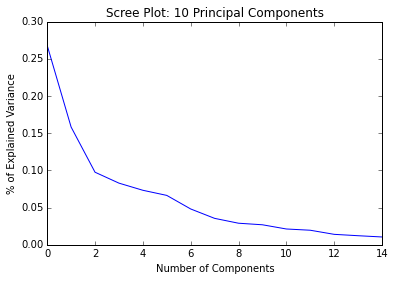

In [9]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot: 10 Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% of Explained Variance")
sum(pca.explained_variance_ratio_)

In [ ]:
# SVM for PCA
svc_bo(svccv_pca)


In [ ]:
# Build a new model by using the best parameters
# Build a new model by using the best parameters
best_C = 
best_kernel = 
beset_gamma = 
svc_pca_best = SVC(Kernel=best_kernel, C=best_C, gamma=beset_gamma)
svc_pca_best

In [ ]:
svc_pca_best.fit(pca_transformed, train_labels)

# accuracy of trianing dataset
print "Accuracy of best SVC model on training: %s" % str(svc_pca_best.score(pca_transformed, train_labels))

# accuracy of testing dataset
print "Accuracy of best SVC model on training: %s" % str(svc_pca_best.score((pca_transformed_test, test_labels))


In [ ]:
# use the best params to predict
svc_pac_true, svc_pca_pred = test_labels, svc_pca_best.predict(pca_transformed_test)
svc_pca_pred



In [ ]:
test_data_df = result_table(svc_pac_true, svc_pca_pred)
test_data_df

In [15]:
# Do everything with bayesian optimizer.
# Drawback: the optimizer will assume the categorical values are ordered
# (i.e., if linear and rbf do very poorly, it will likely assume poly would also do poorly)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def svccv(C, gamma, kernel):
    val = cross_val_score(
        SVC(C=C, gamma=gamma, kernel = kernels[int(kernel)], random_state=2017),
        train, train_labels, 'f1', cv=5, n_jobs = 4
    ).mean()

    return val

def svccv_pca(C, gamma, kernel):
    val = cross_val_score(
        SVC(C=C, gamma=gamma, kernel = kernels[int(kernel)], random_state=2017),
        pca_transformed, train_labels, 'f1', cv=5, n_jobs = 4
    ).mean()

    return val



def svc_bo(fvc=svccv):
    start_time = time.time()
    
    gp_params = {"alpha": 1e-5}

    svcBO = BayesianOptimization(fvc,
        {'C': (0.001, 100), 'gamma': (0.0001, 0.1), 'kernel': (0, 3.5)})
    svcBO.explore({'C': [0.001, 0.01, 0.1], 'gamma': [0.001, 0.01, 0.1]})

    svcBO.maximize(n_iter=10, **gp_params)
    print('-' * 53)
    print '\n%f' % (time.time() - start_time)
    
    print "Bayesian Optimization Best Score: %d" % svcBO.res['max']['max_val']

    print "Bayesian Optimization Best Parameters: %s" % str(svcBO.res['max']['max_params'])

    print "Bayesian Optimization  Parameters: %s" % str(svcBO.res['all'])

    
# def svc_gs(C, gamma):
#     gs_params = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
#                 'C': C,
#                 'gamma': gamma}
#     clf = GridSearchCV(SVC, gs_params, cv=5)
#     clf.fit(train, train_labels)
    
#     print(clf.best_params_)
#     print clf.score
    
#     y_true, y_pred = y_test, clf.best_params_.predict(X_test)
#     print(classification_report(y_true, y_pred))

    